In [2]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Using Pretrained Weights

In [3]:
base=VGG16(weights='imagenet',include_top=False,input_shape=(150,150,3))

58889256/58889256 [==============================] - 0s 0us/step


In [4]:
base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

# Adding Custom Dense Layer for Transfer Learning

In [13]:
model=Sequential()
model.add(base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [15]:
base.trainable=False

# Labeling Data

In [16]:
# generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


# Normalizing Data

In [17]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [19]:
history=model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
625/625 [==============================] - 49s 77ms/step - loss: 1.0788 - accuracy: 0.8867 - val_loss: 0.1615 - val_accuracy: 0.9418
Epoch 2/10
625/625 [==============================] - 47s 75ms/step - loss: 0.1668 - accuracy: 0.9352 - val_loss: 0.1206 - val_accuracy: 0.9501
Epoch 3/10
625/625 [==============================] - 47s 74ms/step - loss: 0.1144 - accuracy: 0.9546 - val_loss: 0.1151 - val_accuracy: 0.9559
Epoch 4/10
625/625 [==============================] - 45s 71ms/step - loss: 0.0866 - accuracy: 0.9657 - val_loss: 0.1315 - val_accuracy: 0.9421
Epoch 5/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0709 - accuracy: 0.9722 - val_loss: 0.1020 - val_accuracy: 0.9602
Epoch 6/10
625/625 [==============================] - 44s 71ms/step - loss: 0.0688 - accuracy: 0.9742 - val_loss: 0.0775 - val_accuracy: 0.9691
Epoch 7/10
625/625 [==============================] - 47s 75ms/step - loss: 0.0608 - accuracy: 0.9772 - val_loss: 0.0549 - val_accuracy:

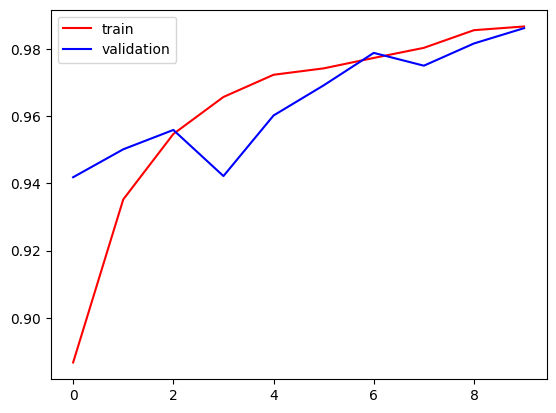

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

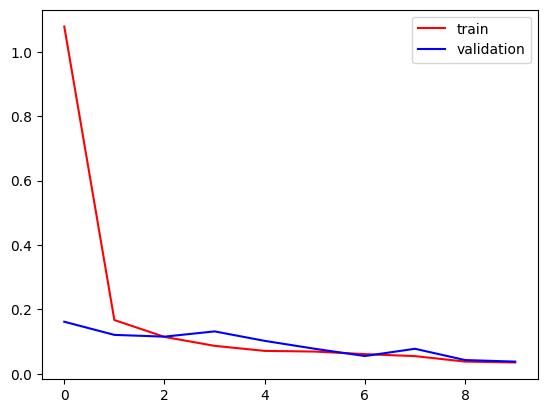

In [21]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()